# 911 Calls EDA

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['911.csv']


In [ ]:
# Read the dataset
df = pd.read_csv("../input/911.csv")

## **Data Exploration**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [13]:
# Top zip-codes for 911 calls
df['zip'].value_counts().iloc[:5]

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

In [100]:
# Top townships for 911 calls
df['twp'].value_counts().iloc[:5]

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

In [16]:
# Total no. of titles
df['title'].nunique()

141

In [21]:
# Create another column for the 'Categorical Reason' for 911 call
df['reason'] = df['title'].apply(lambda x: x.split(': ')[0])
print(df['reason'].unique())
df.head()

['EMS' 'Fire' 'Traffic']


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [22]:
# Counts of 'Reason' as available in the dataset
df['reason'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: reason, dtype: int64

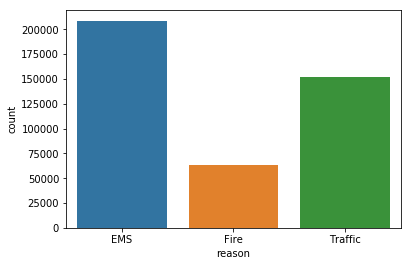

In [26]:
sns.countplot(x='reason', data=df)

In [28]:
type(df['timeStamp'].iloc[0])

str

In [35]:
# Change the datatype of the 'Time Stamp' column to 'datetime'
df['timeStamp'] = df['timeStamp'].apply(lambda x: pd.to_datetime(x))
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [42]:
# Extract specifics from the 'timeStamp' column for further exploration
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['day_of_week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [46]:
print(df['day_of_week'].unique())
df.head()

[3 4 5 6 0 1 2]


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


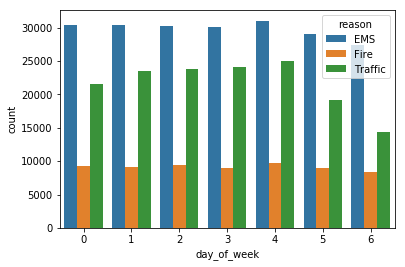

In [47]:
# Countplot showing the day-of-week with separate bars denoting the 'reason'
sns.countplot(x='day_of_week', data=df, hue='reason')

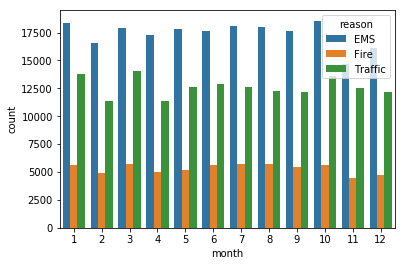

In [48]:
# Countplot showing the month with separate bars denoting the 'reason'
sns.countplot(x='month', data=df, hue='reason')

         lat    lng   desc     ...       reason   hour  day_of_week
month                          ...                                 
1      37824  37824  37824     ...        37824  37824        37824
2      32828  32828  32828     ...        32828  32828        32828
3      37666  37666  37666     ...        37666  37666        37666
4      33583  33583  33583     ...        33583  33583        33583
5      35644  35644  35644     ...        35644  35644        35644

[5 rows x 12 columns]


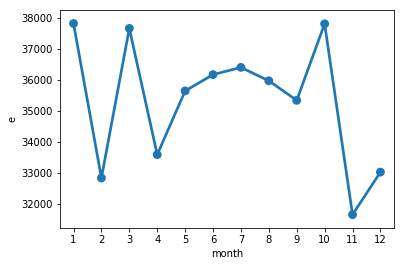

In [57]:
# Plot denoting no. of calls by month
bymonth = df.groupby('month').count()
print(bymonth.head())
sns.pointplot(x='month', y='e', data=bymonth.reset_index())

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


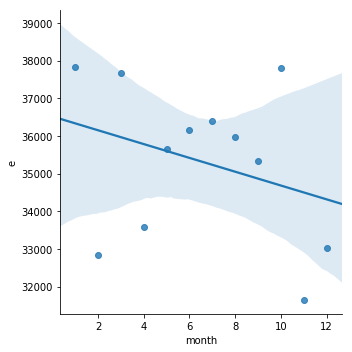

In [55]:
sns.lmplot(x='month', y='e', data=bymonth.reset_index())

In [60]:
# Extract and create a separate column for the date info
df['date'] = df['timeStamp'].apply(lambda x: x.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day_of_week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3,2015-12-10


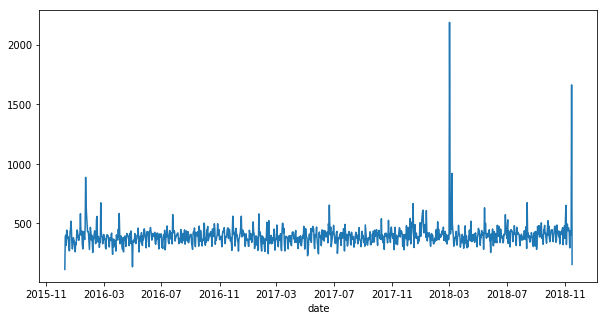

In [69]:
# Plot showing the counts of calls based on the dates
plt.figure(figsize=(10, 5))
df.groupby('date').count()['e'].plot()

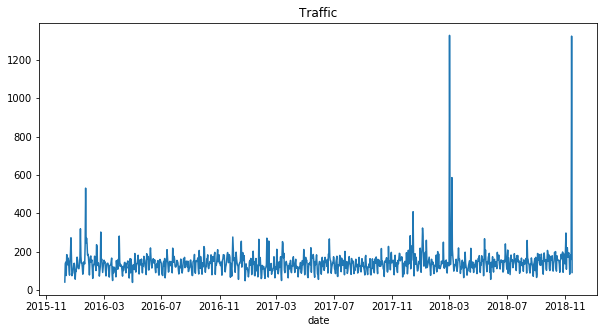

In [75]:
# Plot showing the counts of calls for Traffic use cases based on the dates
plt.figure(figsize=(10, 5))
plt.title('Traffic')
df[df['reason'] == 'Traffic'].groupby('date').count()['e'].plot()

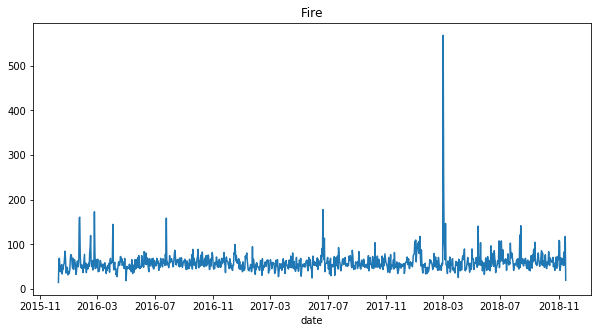

In [72]:
# Plot showing the counts of calls for Fire use cases based on the dates
plt.figure(figsize=(10, 5))
plt.title('Fire')
df[df['reason'] == 'Fire'].groupby('date').count()['e'].plot()

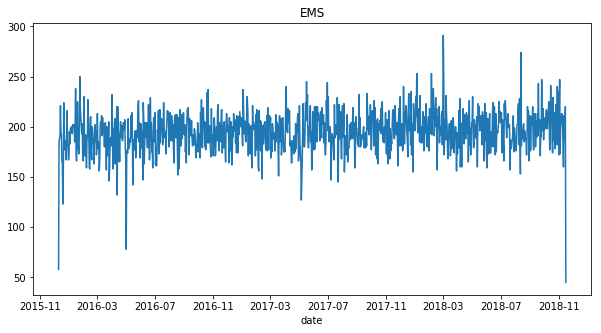

In [76]:
# Plot showing the counts of calls for EMS use cases based on the dates
plt.figure(figsize=(10, 5))
plt.title('EMS')
df[df['reason'] == 'EMS'].groupby('date').count()['e'].plot()

In [93]:
# Create another column for the day name, extracted out of the timeStamp column
df['day_name'] = df['timeStamp'].apply(lambda x: x.day_name())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day_of_week,date,day_name
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,2015-12-10,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,2015-12-10,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3,2015-12-10,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3,2015-12-10,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3,2015-12-10,Thursday


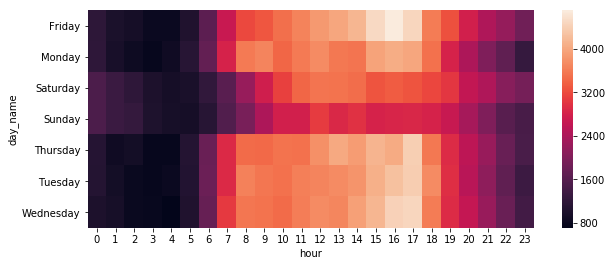

In [94]:
# Heatmap displaying the correlation among day_name and hours
countby_day_hour = df.groupby(by=['day_name', 'hour']).count().unstack(level=-1)['lat']
plt.figure(figsize=(10, 4))
sns.heatmap(countby_day_hour)

<Figure size 720x432 with 0 Axes>

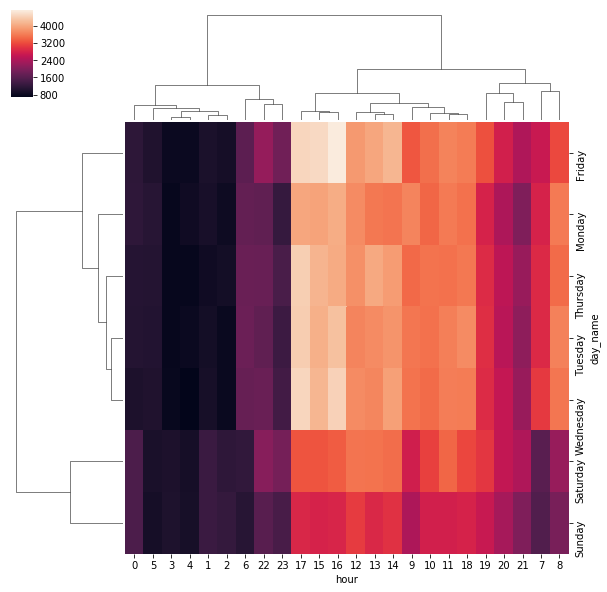

In [96]:
# Clustermap displaying the correlation among day_name and hours
plt.figure(figsize=(10, 6))
sns.clustermap(countby_day_hour)

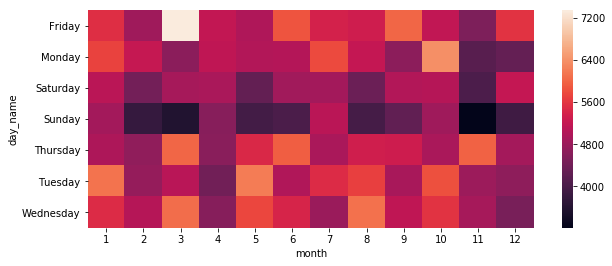

In [97]:
# Heatmap displaying the correlation among day_name and month
countby_day_month = df.groupby(by=['day_name', 'month']).count().unstack(level=-1)['lat']
plt.figure(figsize=(10, 4))
sns.heatmap(countby_day_month)

<Figure size 720x432 with 0 Axes>

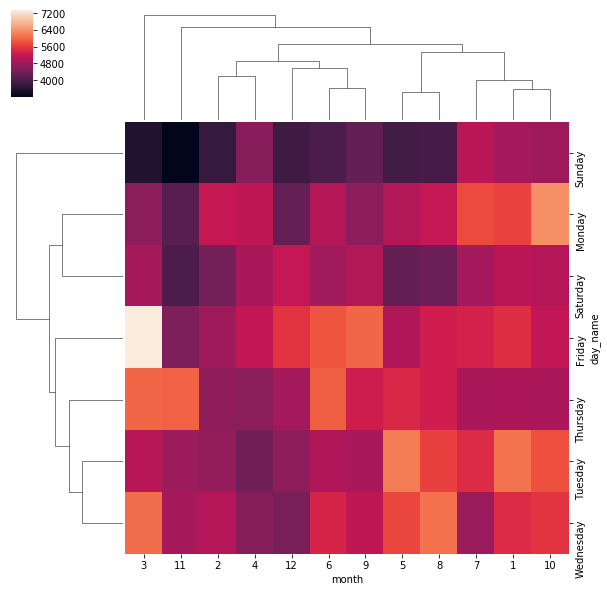

In [98]:
# Clustermap displaying the correlation among day_name and month
plt.figure(figsize=(10, 6))
sns.clustermap(countby_day_month)